In [10]:
import os
import cv2
from matplotlib import pyplot as plt
from cv2 import imread
import numpy as np
import math

In [11]:
data_path = fr'C:\Users\hamid\Desktop\1st_phase\Data'
os.listdir(data_path)

['Cars', 'Persion_train', 'Plates', 'Segments']

In [12]:
include={'Cars'}
data=dict()
data['data']=[]
for subdir in os.listdir(data_path):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(data_path, subdir) 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    data['data'].append(im)

Cars


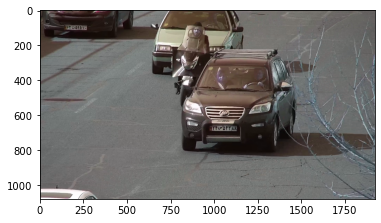

In [13]:
#path = "~Desktop/CV Project/Data/Cars"
#image = cv2.imread(path +'frame12.jpg')
image = data['data'][1]
plt.imshow(image)

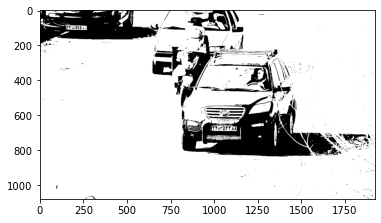

In [14]:
imagegray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imagegray, 60, 255, 0)
plt.imshow(thresh,'gray')

In [15]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [16]:
def closest(node, nodes):
    nodes = np.asarray(nodes)
    d = 1000
    index = 1000
    for i in range(len(nodes)):
        dist = math.dist(node, nodes[i][0])
        if d > dist:
            d = dist
            index = i
    return(round(d,1))

In [17]:
def ifrect(n1,n2,n3,n4):
    a = abs(n1-n2)
    b = abs(n2-n3)
    c = abs(n3-n4)
    d = abs(a-b)
    e = abs(b-c)
    f = abs(d-e)
    return(f)

In [18]:
a = []
for i in range(len(contours)):
    cnt = contours[i]
    x,y,w,h = cv2.boundingRect(cnt)
    
    area = cv2.contourArea(cnt)
    rect_area = w*h
    extent = float(area)/rect_area
    aspect_ratio = float(w)/h
    solidity = ( float(area)/rect_area ) if rect_area != 0 else 0
    
    hull = cv2.convexHull(cnt)
    
    
    
    cn1 = closest([x,y],hull)
    cn2 = closest([x+w,y],hull)
    cn3 = closest([x,y+h],hull)
    cn4 = closest([x+w,y+h],hull)
    
    cls = ifrect(cn1,cn2,cn3,cn4)
    
    if extent > 0.51 and  cls < 5 and aspect_ratio > 3 and aspect_ratio < 7 and area > 1500:
        a.append(i)
        print(i,'cls=',cls,'aspect_ratio=',aspect_ratio,'extent=',extent,'area=',area)

25 cls= 4.6 aspect_ratio= 4.571428571428571 extent= 0.7885044642857143 area= 2826.0
1286 cls= 2.9 aspect_ratio= 4.235294117647059 extent= 0.8214869281045751 area= 4022.0
1774 cls= 2.9000000000000012 aspect_ratio= 6.2272727272727275 extent= 0.5228931652289317 area= 1576.0


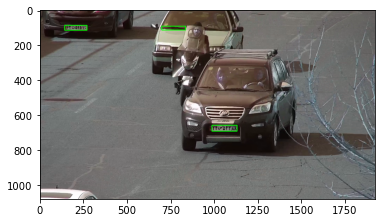

In [19]:
img = image.copy()
for i in a:
    cnt = contours[i]
    x,y,w,h = cv2.boundingRect(cnt)
    plt.imshow(cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3))